Extracting MINST_data/train-images-idx3-ubyte.gz
Extracting MINST_data/train-labels-idx1-ubyte.gz
Extracting MINST_data/t10k-images-idx3-ubyte.gz
Extracting MINST_data/t10k-labels-idx1-ubyte.gz
Epoch:  0001 cost =  2.929339812
Epoch:  0002 cost =  1.054744445
Epoch:  0003 cost =  0.843101994
Epoch:  0004 cost =  0.741991046
Epoch:  0005 cost =  0.677550157
Epoch:  0006 cost =  0.632101128
Epoch:  0007 cost =  0.596419077
Epoch:  0008 cost =  0.567995280
Epoch:  0009 cost =  0.544459804
Epoch:  0010 cost =  0.524640927
Epoch:  0011 cost =  0.507643032
Epoch:  0012 cost =  0.492818623
Epoch:  0013 cost =  0.479903118
Epoch:  0014 cost =  0.468260600
Epoch:  0015 cost =  0.457726435
Learning finished
Accuracy:  0.8899
Label:  [3]
Prediction:  [3]


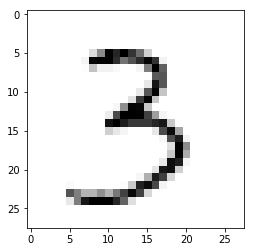

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777) # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MINST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle 
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
    print("Learning finished")
    
    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()